In [3]:
import pandas as pd

# 載入數據
df1 = pd.read_excel(r'C:\Users\User\Dropbox\Movie\df3.xlsx')

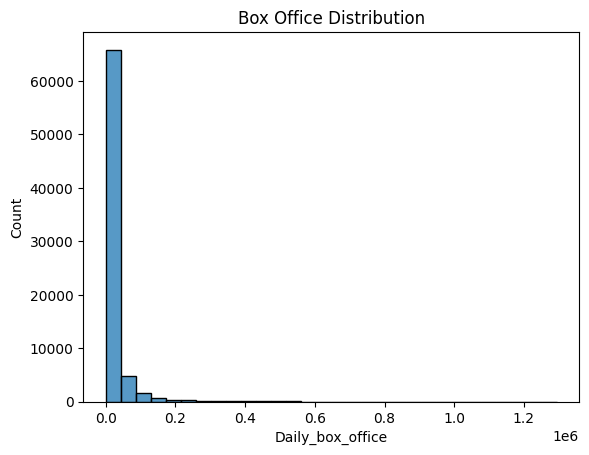

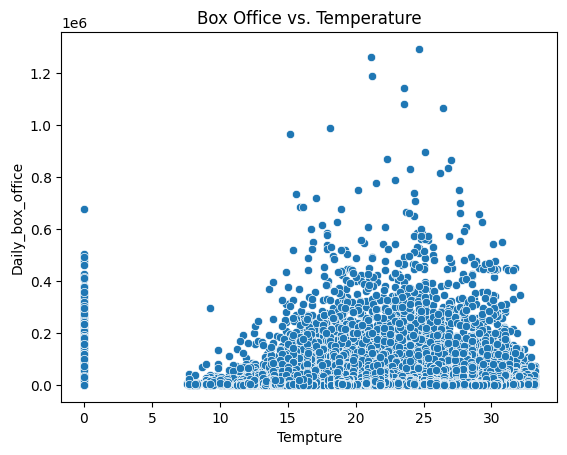

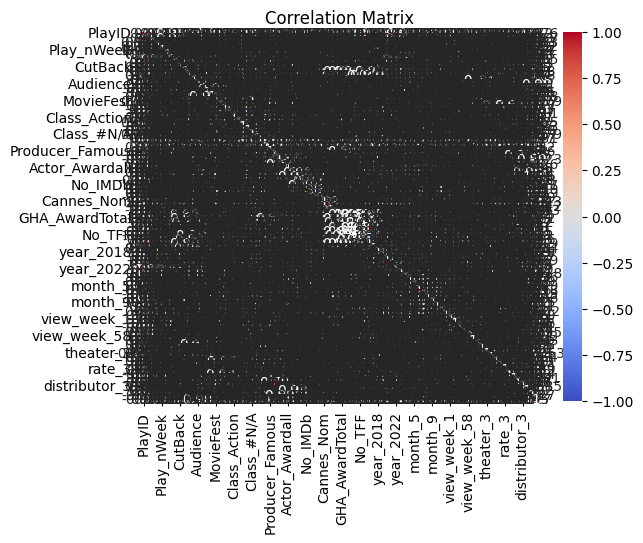

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 直方圖查看單個變數分佈
sns.histplot(df1['Daily_box_office'], bins=30)
plt.title('Box Office Distribution')
plt.show()

# 散點圖探索票房與其他變數的關係
sns.scatterplot(x='Tempture', y='Daily_box_office', data=df1)
plt.title('Box Office vs. Temperature')
plt.show()

# 相關矩陣熱圖
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 選擇特徵和標籤
X = df1[['Tempture', 'Rainfall']]
y = df1['Daily_box_office']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測和評估
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))


MSE: 2197558406.4149566


In [4]:
import pandas as pd

# 加载数据
# data = pd.read_csv('your_data.csv')

# 设置索引
df1.set_index(['PlayYear', 'PlayID', 'MovieID'], inplace=True)

# 计算描述性统计
desc_stats = df1.describe()

# 计算相关性矩阵
corr_matrix = df1.corr()

# 打印结果
print(desc_stats)
print(corr_matrix)


           PlayWeek       Weekend    Play_nWeek     PlayMonth       ViewDay  \
count  74232.000000  74232.000000  74232.000000  74232.000000  74232.000000   
mean       4.014643      0.443299      1.679074      6.916855     22.452608   
std        2.023741      0.496778      1.286412      3.734195     19.079720   
min        1.000000      0.000000      0.000000      1.000000      0.000000   
25%        2.000000      0.000000      1.000000      3.000000      9.000000   
50%        4.000000      0.000000      2.000000      8.000000     18.000000   
75%        6.000000      1.000000      3.000000     10.000000     31.000000   
max        7.000000      1.000000      4.000000     12.000000    167.000000   

            CutBack  GHA_View_Code  TFF_View_Code  Theater_Class  \
count  74232.000000   74232.000000   74232.000000   74232.000000   
mean       0.249946       1.924561       1.690443       3.160066   
std        0.432985       1.069285       0.935123       1.299387   
min        0.000

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 假设 data 是你的 DataFrame
# 选择特征，这里假设我们除了 'Audience' 外，其他都作为特征
X = df1.drop('Audience', axis=1)
y = df1['Audience']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# 训练随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 获取特征重要性
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 打印每个特征的重要性
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")


Daily_box_office: 0.987290663034734
Theater_Class: 0.001964959165638822
Tempture: 0.001320013462887516
ViewDay: 0.0011784870834325933
CutBack: 0.0010457965781485693
theater_1: 0.0008277609483035575
Movie_Length: 0.0005096475568023601
IMDb_rating: 0.00037084598034667435
Rainfall: 0.00037049787339531664
Play_nWeek: 0.00036627832441309707
month_5: 0.0003399419735667514
PlayWeek: 0.0003247471645325866
No_Weather: 0.0002747008820242538
PlayMonth: 0.00019804108005318563
month_6: 0.00016206784944364794
GHA_Nom: 0.0001473776896196583
theater_4: 0.00014406807892796222
Rated: 0.00013286842686204592
month_9: 0.00012787790228654142
theater_2: 0.00012717650655470468
Weekend: 0.00011940298877123796
Subsidy_Amount: 0.0001147485013664777
year_2019: 0.00011183361665243496
Distrbutor: 0.00010253169751274285
TFF_AwardTotal: 9.8051697786952e-05
TFF_Nom: 9.719232536702412e-05
Class_Darma: 8.926633983112297e-05
lnsubsidy: 8.704819853290126e-05
GHA_AwardTotal: 8.4716654105524e-05
distributor_3: 8.33214866802

+ 變數類別

    + 數值變數 
        + Daily_box_office
        + Audience
        + Tempture
        + Rainfall
        + Movie_Length
        + Budget
        + IMDb_rating
        + Director_Award
        + Actor_Awardall
        + Subsidy_Amount 
       
        + Oscar_AwardTotal
        + Cannes_AwardTotal
        + TFF_Nom
        + TFF_AwardTotal
        + Distrbutor

         
    + 類別變數
        + PlayWeek
        + Play_nWeek
        + PlayMonth
        + GHA_View_Code
        + TFF_View_Code
        + Theater_Class
        + Rated





    + 虛擬變數
        + Weekend
        + CutBack
        + No_Weather
        + MovieFest
        + Class_Darma
        + Class_Comedy
        + Class_Action
        + Class_Documentary
        + Class_Animation
        + Class_Other
        + Class_#N/A
        + No_Movie_Length
        + Producer_Famous
        + No_Budget
        + Subsidy_Yes
        + No_IMDb
        + No_Oscar
        + Cannes_Nom
        + No_Cannes
        + No_GHA
        + No_TFF
        + TFF_NomData
        + view_afhorse
        + view_aftaipei
            year_2018
            year_2019
            year_2020
            year_2021
            year_2022
            month_2
            month_3
            month_4
            month_5
            month_6
            month_7
            month_8
            month_9
            month_10
            month_11
            month_12
            view_week_1
            view_week_2
            view_week_3
            view_week_4
            view_week_58
            view_week_912
            theater_1
            theater_2
            theater_3
            theater_4
            rate_1
            rate_2
            rate_3
            rate_4
            distributor_1
            distributor_2
            distributor_3







    + 特殊變數
        + ViewDay
        + Oscar_Nom
            
        + Cannes_Nom
   

    

In [4]:
import pandas as pd

# 假设 data 是你的包含 'Audience' 和 'Daily_box_office' 的 DataFrame
correlation = df1[['Audience', 'Daily_box_office']].corr()
print(correlation)


                  Audience  Daily_box_office
Audience          1.000000          0.990372
Daily_box_office  0.990372          1.000000


                    PlayID   MovieID  PlayWeek   Weekend  Play_nWeek  \
PlayID            1.000000  0.994845  0.003647  0.005145   -0.002596   
MovieID           0.994845  1.000000  0.004636  0.006545   -0.003315   
PlayWeek          0.003647  0.004636  1.000000  0.290428    0.006959   
Weekend           0.005145  0.006545  0.290428  1.000000    0.012874   
Play_nWeek       -0.002596 -0.003315  0.006959  0.012874    1.000000   
...                    ...       ...       ...       ...         ...   
distributor_2    -0.031648 -0.040291  0.002760  0.003721   -0.015989   
distributor_3     0.058149  0.065644  0.006730 -0.000598    0.001271   
lnsubsidy         0.059961  0.061738 -0.003008 -0.005961   -0.001237   
lnbudget         -0.072176 -0.073012 -0.001311 -0.000196   -0.003965   
Daily_box_office -0.075935 -0.067095  0.032946  0.121573    0.016929   

                  PlayMonth  PlayYear   ViewDay   CutBack  GHA_View_Code  ...  \
PlayID             0.068247  0.981516  0.186725  0.167

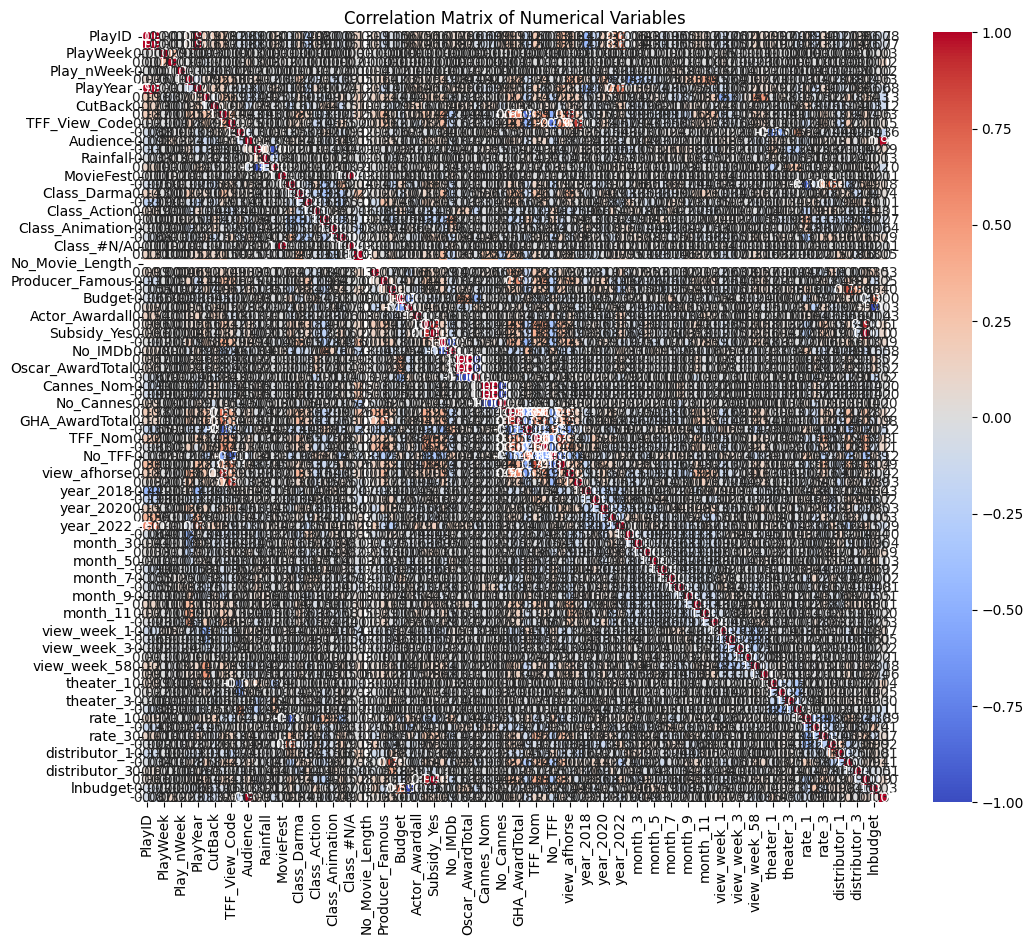

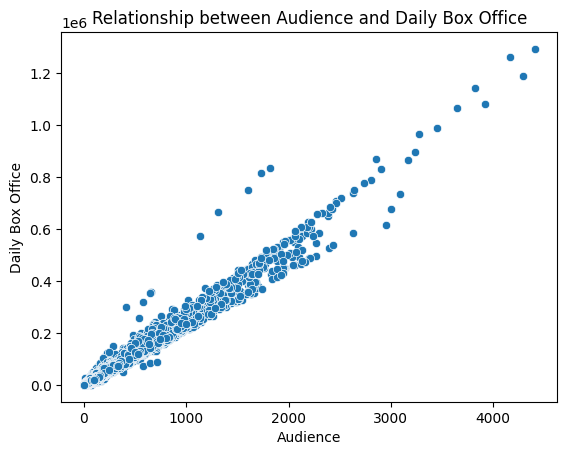

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关矩阵
correlation_matrix = df1.corr()
print(correlation_matrix)

# 绘制相关性热图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 选择与票房高度相关的变量进行散点图分析
sns.scatterplot(x='Audience', y='Daily_box_office', data=df1)
plt.xlabel('Audience')
plt.ylabel('Daily Box Office')
plt.title('Relationship between Audience and Daily Box Office')
plt.show()
